<a href="https://colab.research.google.com/github/FahimS45/Python_mini_projects/blob/master/Time_Frequency_Analysis_of_Wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Project regarding Time-Frequency Analysis of EEG data**

**Time-Frequency Analysis:**

Time-frequency analysis is a method used to analyze signals in both the time and frequency domains simultaneously. It provides a way to examine how the frequency content of a signal changes over time. This is particularly useful for analyzing non-stationary signals, where the frequency components of the signal vary over time.

In [ ]:
# Importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# **Creating real and complex Morlet wavelets**

**Real Morlet Wavelets:**

Think of the real Morlet wavelet as a symmetric wave shape. It is a smooth and continuous waveform that starts from zero, increases to a peak, and then decreases back to zero. It has a bell-shaped curve. The real Morlet wavelet is useful for detecting different patterns or oscillations in a signal. It helps us understand if there are specific frequencies or rhythmic patterns present in the signal. For example, it can help identify brainwave patterns like alpha, beta, theta, or gamma rhythms.

In [ ]:
# Functions to create Real wavelets
def createRealWavelet(time,freq,fwhm):
  # time = time for wavelet, should be zero-centered
  # freq = peak frequency for wavelet
  # fwhm = full-width at half-maximum in seconds
  sinepart = np.cos(2*np.pi*freq*time)
  # sinepart(t) = cos(2πft)
  gauspart = np.exp( (-4*np.log(2)*time**2)/(fwhm**2) )
  # gauspart(t) = e^(-(4ln(2)t^2) / (σ^2))
  return sinepart*gauspart

In [ ]:
# Parameters
freq  = 5 # Hz
fwhm  = .5
srate = 500 # Hz #sampling rate
time  = np.arange(-2*srate,2*srate)/srate
npnts = len(time) # number of time points

# Creating one wavelet and visualizing in time and in frequency domains
wavelet = createRealWavelet(time,freq,fwhm)

hz = np.linspace(0,srate/2,int(npnts/2))
# An array of frequency values from 0 to half of the sampling rate (srate/2), evenly spaced.

waveletX = abs(np.fft.fft(wavelet)/npnts)**2
# The power spectrum of the wavelet.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-18-99c64039dc35>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[1].stem(hz,waveletX[:len(hz)],'k',use_line_collection=True)


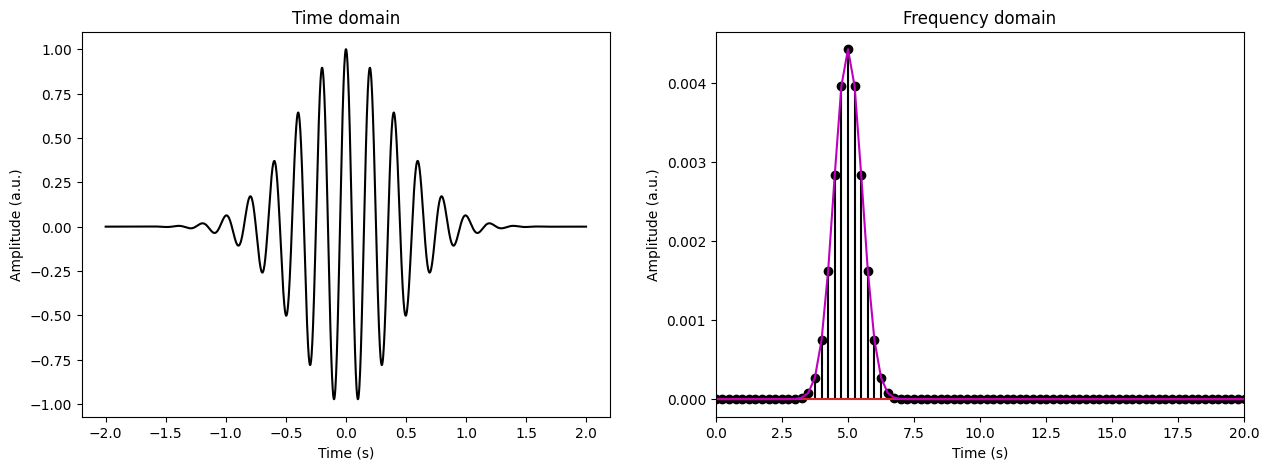

In [ ]:
# Setting-up the figure
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Time-domain version
ax[0].plot(time,wavelet,'k')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (a.u.)')
ax[0].set_title('Time domain')

# Frequency-domain version
ax[1].stem(hz,waveletX[:len(hz)],'k',use_line_collection=True)
ax[1].plot(hz,waveletX[:len(hz)],'m')
ax[1].set_xlim([0,20])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude (a.u.)')
ax[1].set_title('Frequency domain')

plt.show()

**Complex-valued Morlet wavelets:**

The complex Morlet wavelet is a more advanced version of the Morlet wavelet. It also has the shape of a bell-shaped curve, but it includes both real and imaginary parts. The real part of the complex Morlet wavelet gives us information about the amplitude or strength of the signal at different frequencies. The imaginary part tells us about the phase or timing of the signal at those frequencies. Phase information helps us understand the relationships between different frequencies in a signal.

In [ ]:
# Function to create Complex wavelets
def createComplexWavelet(time,freq,fwhm):
  sinepart = np.exp( 1j*2*np.pi*freq*time )
  gauspart = np.exp( (-4*np.log(2)*time**2)/(fwhm**2) )
  return sinepart*gauspart

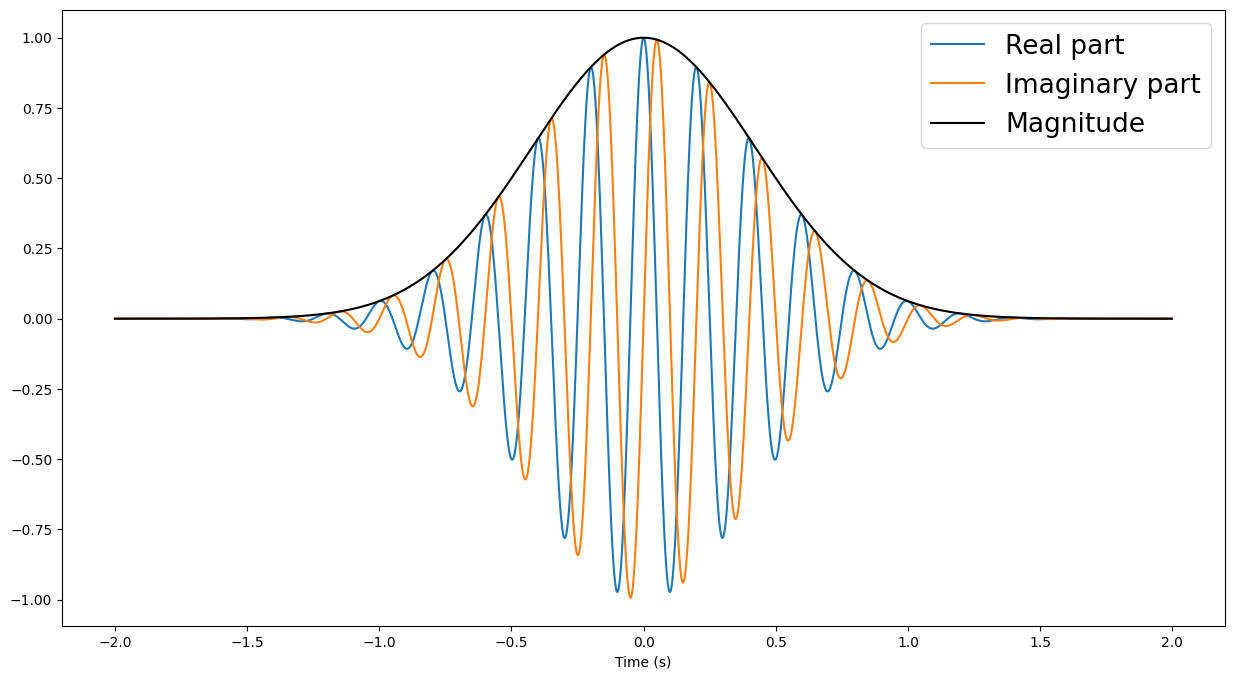

In [ ]:
# Creating a complex Morlet wavelet
wavelet = createComplexWavelet(time,5,1)

# Plotting using matplotlib
fig = plt.subplots(1,figsize=(15,8))
plt.plot(time,np.real(wavelet),label='Real part')
plt.plot(time,np.imag(wavelet),label='Imaginary part')
plt.plot(time,np.abs(wavelet),'k',label='Magnitude')

plt.xlabel('Time (s)')
plt.legend(fontsize=19)
plt.show()

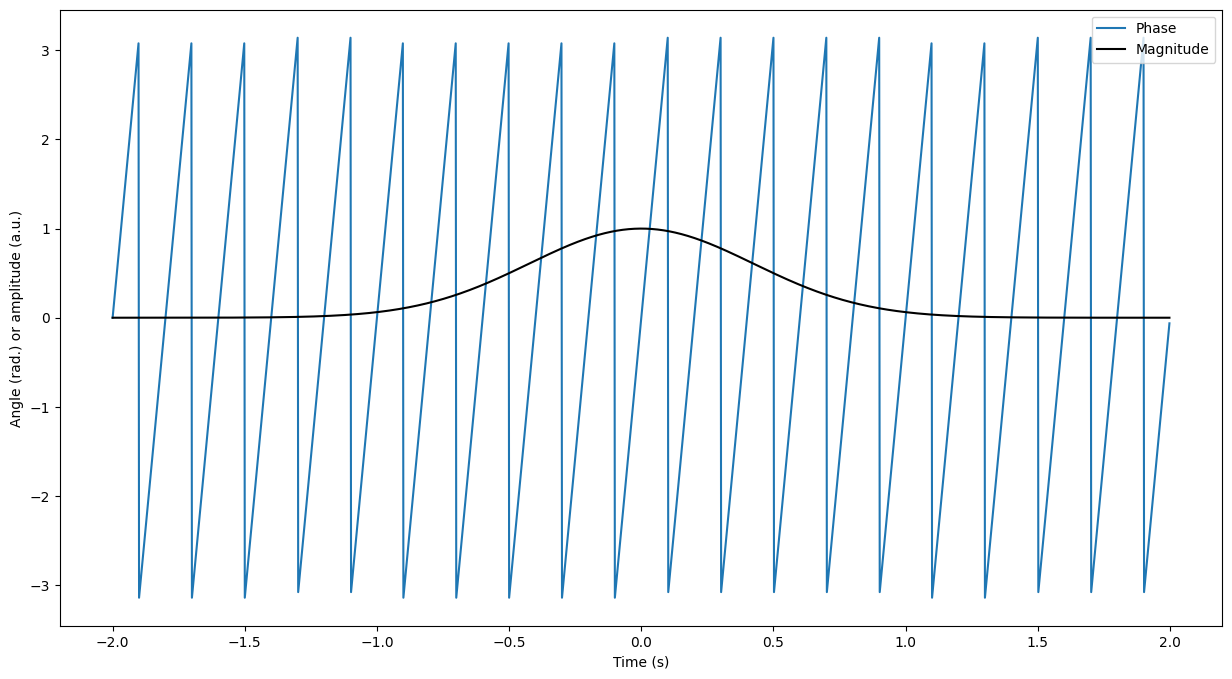

In [ ]:
# Plotting its magnitude and phase using matplotlib
fig = plt.subplots(1,figsize=(15,8))
plt.plot(time,np.angle(wavelet),label='Phase')
plt.plot(time,np.abs(wavelet),'k',label='Magnitude')

plt.xlabel('Time (s)')
plt.ylabel('Angle (rad.) or amplitude (a.u.)')
plt.legend()
plt.show()

# **Let's create a wavelet family**

In [ ]:
# Parameters
nfrex  =   40
# number of frequency values we want in the range between lofreq and hifreq

lofreq =    2   # Hz
hifreq =   80   # Hz

frex   = np.linspace(lofreq,hifreq,nfrex)
print(frex)
fwhms  = np.linspace(4,1,nfrex)
print(fwhms)

[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34. 36.
 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70. 72.
 74. 76. 78. 80.]
[4.         3.92307692 3.84615385 3.76923077 3.69230769 3.61538462
 3.53846154 3.46153846 3.38461538 3.30769231 3.23076923 3.15384615
 3.07692308 3.         2.92307692 2.84615385 2.76923077 2.69230769
 2.61538462 2.53846154 2.46153846 2.38461538 2.30769231 2.23076923
 2.15384615 2.07692308 2.         1.92307692 1.84615385 1.76923077
 1.69230769 1.61538462 1.53846154 1.46153846 1.38461538 1.30769231
 1.23076923 1.15384615 1.07692308 1.        ]


In [ ]:
# Creating a family of wavelets
waveletfam = np.zeros((nfrex,npnts),dtype=complex)
print(waveletfam)
print(npnts)

for wi in range(nfrex):
  waveletfam[wi,:] = createComplexWavelet(time,frex[wi],fwhms[wi])
print(waveletfam)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
2000
[[ 5.00000000e-01+4.89858720e-16j  5.00535156e-01+1.25824699e-02j
   5.00753554e-01+2.51918393e-02j ...  5.00654178e-01-3.78201307e-02j
   5.00753554e-01-2.51918393e-02j  5.00535156e-01-1.25824699e-02j]
 [ 4.86462279e-01+9.53191157e-16j  4.86548210e-01+2.44771989e-02j
   4.85401844e-01+4.89629747e-02j ...  4.83022538e-01-7.33952534e-02j
   4.85401844e-01-4.89629747e-02j  4.86548210e-01-2.44771989e-02j]
 [ 4.72504508e-01+1.38876272e-15j  4.71868720e-01+3.56456361e-02j
   4.68543986e-01+7.11952380e-02j ...  4.62541186e-01-1.06445976e-01j
   4.68543986e-01-7.11952380e-02j  4.71868720e-01-3.56456361e-02j]
 ...
 [ 2.41150634e-04+2.26856868e-17j  1.41620744e-04+2.00166268e-04j
  -8.29762121e-

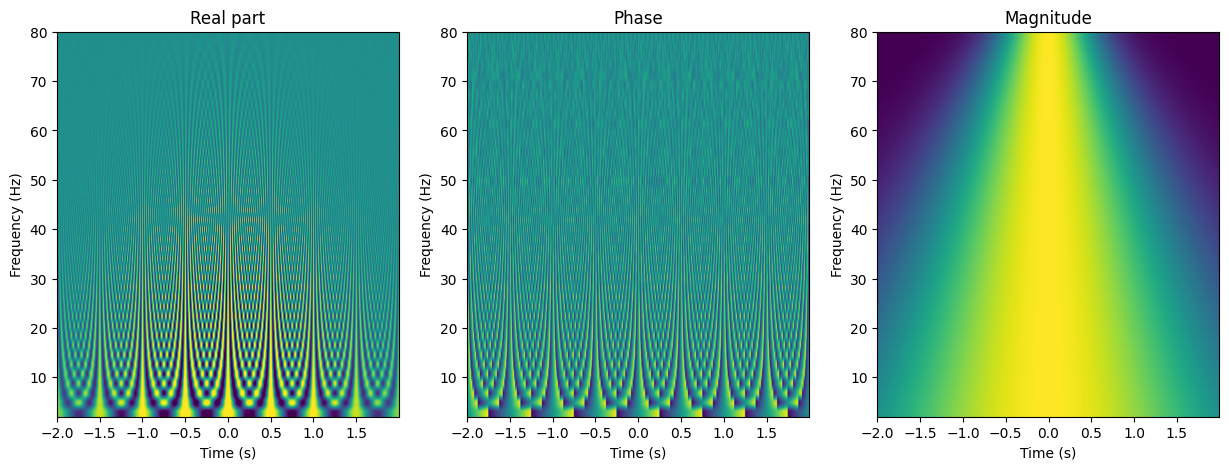

In [ ]:
# Setting-up the figure
fig,ax = plt.subplots(1,3,figsize=(15,5))

# Showing the real part
ax[0].imshow(np.real(waveletfam),
             aspect='auto',origin='lower',
             extent=[time[0],time[-1],lofreq,hifreq],
             vmin=-.8,vmax=.8)
# The extent parameter in imshow is used to define the range of values for
# the x-axis and y-axis of the plot. It takes a list or tuple of
# four values: [x_min, x_max, y_min, y_max].

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_title('Real part')

# Showing the angles
ax[1].imshow(np.angle(waveletfam),
             aspect='auto',origin='lower',
             extent=[time[0],time[-1],lofreq,hifreq])

ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_title('Phase')


# Showing the magnitudes
ax[2].imshow(np.abs(waveletfam),
             aspect='auto',origin='lower',
             extent=[time[0],time[-1],lofreq,hifreq])

ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Frequency (Hz)')
ax[2].set_title('Magnitude')


plt.show()

# **Importing the EEG data from a local drive**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sampleEEGdata.mat to sampleEEGdata.mat


In [ ]:
# Importing the data to python
from scipy.io import loadmat
EEG = loadmat('sampleEEGdata.mat')
#print(EEG)

# Extracting the necessary information
times = np.squeeze(EEG['EEG'][0][0][14])
# np.squeeze is used to remove any extra dimensions from the extracted data.

data  = EEG['EEG'][0][0][15]
fs    = EEG['EEG'][0][0][11][0][0].astype(int) # sampling rate

print(fs)
print(np.shape(data)) # The size of the data array along each dimension.

256
(64, 640, 99)


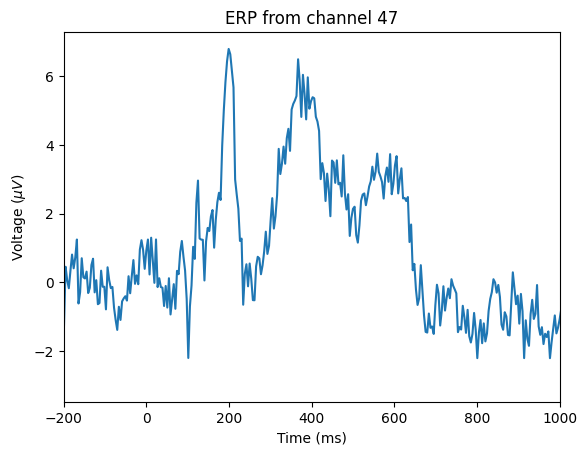

In [ ]:
# Computing Event-Related Potential (ERP)
erp = np.mean(data,axis=2)[46,:]
# Computes the mean along the third axis
# This results in an array where each element represents
# the average value across trials for a specific time point.

# Plotting trial-averaged response usning matplotlib
plt.plot(times,erp)
plt.xlim([-200,1000])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage ($\mu V$)')
plt.title('ERP from channel 47')
plt.show()

# **Wavelet Convolution**

- Wavelet convolution is a mathematical operation that involves convolving a wavelet function with a signal or data. It is commonly used in time-frequency analysis to analyze and extract information from signals that vary in both time and frequency domains.

- The process of wavelet convolution involves sliding the wavelet function across the signal, multiplying the wavelet function by the corresponding portion of the signal at each position, and summing up the results. This process is repeated for different positions of the wavelet function to obtain a time-varying representation of the signal's frequency content.



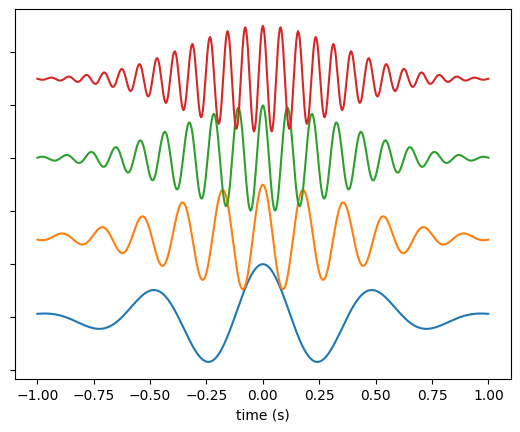

In [ ]:
# Need to make new wavelets with the new sampling rate
nfrex  =   40
lofreq =    2   # Hz
hifreq =   30   # Hz

frex   = np.linspace(lofreq,hifreq,nfrex)
fwhms  = np.linspace(1,.5,nfrex)

wavtime = np.arange(-fs,fs+1)/fs
npnts   = len(wavtime)

waveletfam = np.zeros((nfrex,npnts),dtype=complex)
for wi in range(nfrex):
  waveletfam[wi,:] = createComplexWavelet(wavtime,frex[wi],fwhms[wi])


# Plotting a few wavelets to make sure they look good
for i in range(4):
  plt.plot(wavtime,np.real(waveletfam[i*5,:]) + i*1.5)

plt.xlabel('time (s)')
plt.tick_params(labelleft=False) #labelbottom=False
plt.show()

# **Let's Create a time-frequency map**

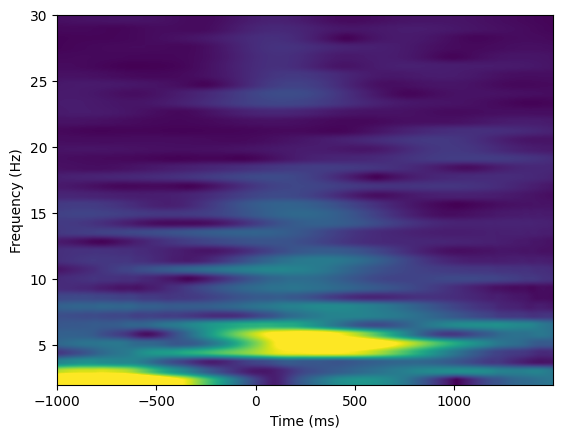

In [ ]:
# Initialize
tf = np.zeros((nfrex,len(times)))

# Looping over frequencies and repeating convolution
for fi in range(nfrex):
  convres = np.convolve(erp,waveletfam[fi,:],mode='same')
  tf[fi,:] = np.abs(convres)

# Plotting
plt.imshow(tf,
          aspect='auto',origin='lower',
          extent=[times[0],times[-1],lofreq,hifreq],
          vmin=0,vmax=100)

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.show()